# Amazon Beauty Products Review-Sentiment Analysis

## Import Necessary Libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Reading the Inspected Dataset 

In [2]:
# Read the file
df2 = pd.read_csv('data_inspected.csv')

In [18]:
# Sample observations
df2.head(10)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21
5,A3IOCPLIMYDBCD,B0000CC64W,5.0,Olay's Finest Olay Regenerist Daily Regenerati...,12,1,good,2009-07-04
6,A5A3C6XVDYUND,B0000CC64W,3.0,Not bad but not a miracle worker Having found ...,1,1,neutral,2013-02-18
7,A3V6Z4RCDGRC44,B0000CC64W,4.0,Nice Product - a Bit Greasy The Olay Regeneris...,6,1,good,2007-07-01
8,A2WW57XX2UVLM6,B0000CC64W,4.0,Clean and Easy I purchased this because it was...,0,0,good,2013-11-22
9,A3M7R4PD0FEPUB,B0000CC64W,5.0,Noticed a difference immediately The first thi...,2,1,good,2009-09-28


In [19]:
new_df=df2[['rating','pos_feedback','neg_feedback','rating_class']]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28576 entries, 0 to 28575
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer      28576 non-null  object 
 1   product       28576 non-null  object 
 2   rating        28576 non-null  float64
 3   review_text   28576 non-null  object 
 4   pos_feedback  28576 non-null  int64  
 5   neg_feedback  28576 non-null  int64  
 6   rating_class  28576 non-null  object 
 7   time          28576 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [17]:
df2.customer.value_counts()

ALNFHVS3SC4FV     177
A1UQBFCERIP7VJ    120
A2P739KOM4U5JB    113
A3NHUQ33CFH3VM    111
AEL6CQNQXONBX     107
                 ... 
A25CGBLRJB6X0S      9
A23P5BO1UGNIRR      9
A16EIVIBBXFAQ0      9
A1APK6FWZC13B       9
ADVSW4W1HHYF7       9
Name: customer, Length: 1340, dtype: int64

## Descriptive Statistics 

In [4]:
# Read statistic summary of numeric variables
df2.describe()

,rating,pos_feedback,neg_feedback
count,28576.000000,28576.000000,28576.000000
mean,4.170493,0.948488,0.324888
std,0.992277,6.829651,1.105870
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000
max,5.000000,549.000000,52.000000


In [5]:
# Customer totals for each rating 
df2['rating'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: rating, dtype: int64

In [6]:
# Customer totals for each rating class
df2['rating_class'].value_counts()

good       22425
neutral     4067
bad         2084
Name: rating_class, dtype: int64

In [7]:
# Print the number of positive feedback
pos = len(df2[df2['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))

# Print the number of negative feedback
neg = len(df2[df2['neg_feedback'] > 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))

# Print the number of no 'helpful' feedback 
total = len(df2)
print('\nNumber of no helpful feedbacks: {}'.format(total - (pos + neg)))

Number of positive feedbacks: 8397

Number of negative feedbacks: 6078

Number of no helpful feedbacks: 14101


In [8]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(df2['customer'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(df2['product'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(df2)/len(df2['customer'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(df2)/len(df2['product'].unique()))))     


Number of unique customers : 1340

Number of unique products : 733

Review per customer: 21.32537313432836

Review per product: 38.9849931787176


**Descriptive Statistic Summary:**

**- Rating Status:**

28576 customer gives ratings and mean of the ratings is 4.17, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good', 'neutral', and 'bad' above. 

According to the statistics on rating stars:

576 customers give 1 star 

1508 customers give 2 stars

4067 customers give 3 stars

8742  customers give 4 stars

13683 customers give 5 stars


On the other hand, if we look for the rating class, the picture is look like below.

2084 customers give bad ratings

4067 customers give neutral ratings

22425 customers give good ratings

**- Feedback Status**

8397 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The mean 0.9 and standard deviation is 6.8 whereas the highest positive feedback number for reviews is 549. That shows we may have some outliers in the dataset. 

6078 customers find the given reviews useless and don't aggree with the them. They give negative feedbacks. The mean 0.3 and standard deviation is 1.1 whereas the highest negative feedback number for reviews is 52.

On the other hand 14101 customers don't give either positive or negative feedbacks for reviews. 

**- Non-numeric variables statistics:**

We have 1340 unique customers and 733 products in this dataset. Each customers averagely give 21 reviews for products and on the other hand, there is averagely 40 reviews for each product in the website. 

On exploratory data analysis, we will check if there is a case for outliers by visualizing data. 

# Inferential Statistics

Because of that in this dataset our input is numerical, and target is categorical we use Kendall Corelation Test to see the correlation between them.

## Kendall Correlation

In [22]:
new_df=df2[['rating','pos_feedback','neg_feedback','rating_class']]

In [23]:
new_df=new_df[new_df['rating_class']!='neutral']

In [24]:
mapping = {'good':1, 'bad':-1}
new_df.rating_class=new_df.rating_class.map(mapping)

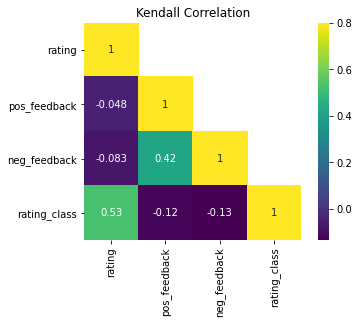

In [25]:

mask=np.array(new_df.corr(method='kendall'))
mask[np.tril_indices_from(mask)] = False

sns.heatmap(new_df.corr(method='kendall'), annot=True,mask=mask, vmax=.8, square=True, cmap='viridis', annot_kws={'size':10})

plt.title('Kendall Correlation')
plt.show()